In [1]:
from models import Enercon_Report; from pathlib import Path

folder_path = Path("data") / "input"
file_name = 'enercon_master_example.pdf'
file_path = Path(folder_path) / file_name

enercon_report = Enercon_Report(file_path)

c:\Users\dbreau\Documents\Repositories\pdf_transformation\venv\Lib\site-packages\pypdf\_crypt_providers\_cryptography.py:32: CryptographyDeprecationWarning: ARC4 has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.ARC4 and will be removed from cryptography.hazmat.primitives.ciphers.algorithms in 48.0.0.
  from cryptography.hazmat.primitives.ciphers.algorithms import AES, ARC4


In [2]:
enercon_report._get_details_on_order()

,0,1
0,Order type,MASTER MAINTENANCE
1,Order number,9912
2,Final date of order completion,"Dec 8, 2023"
3,Completion date of report,"Dec 6, 2023"
4,Inspection lot number,94000351
5,Document number,D084 6.0
6,Nominated person in control of the electrical ...,
9,Nominated person in control of the work activity,
11,Performing team,Team1 ESG FR
12,Performing company,ESG Energy Service Group Sarl


In [3]:
enercon_report._get_defects_summary()

,0,1
0,Free of defects,196
1,With defects,20
2,Total,216


In [4]:
enercon_report._get_converter_master_data()

,0,1
0,Serial number,921
1,Project number,S-07925
2,Site,Dizy-
3,WEC,E-92
4,Control system type,CS8


In [5]:
enercon_report.get_metadata()

,Metadata
Serial number,921
Project number,S-07925
Site,Dizy-
WEC,E-92
Control system type,CS8
Order type,MASTER MAINTENANCE
Order number,9912
Final date of order completion,"Dec 8, 2023"
Completion date of report,"Dec 6, 2023"
Inspection lot number,94000351


In [6]:
enercon_report._get_defects_summary()

,0,1
0,Free of defects,196
1,With defects,20
2,Total,216


In [7]:
table_test = enercon_report._get_defects_summary()

In [8]:
table_test = enercon_report._get_defects_summary()

In [9]:
table_test = enercon_report._get_defects_summary()

In [10]:
enercon_report.extract_inspection_checklist()

,0,1,2
0,Wind energy converter master data,,
1,Serial number,921WECE-92,
2,Project number,S-07925Control system type CS8,
3,Site,Dizy-,
4,Details on order,,
...,...,...,...
313,176,"main component, screwing - rotor hub - blade f...",920079187023
314,177,"main component, screwing - rotor hub - blade f...",920079187022
315,185,"rotor system - front, casingspecial, sealing -...",920079187016
316,Signature,,


In [11]:
enercon_report._get_defects_summary()

,0,1
0,Free of defects,196
1,With defects,20
2,Total,216


In [12]:
enercon_report.get_metadata()

,Metadata
Serial number,921
Project number,S-07925
Site,Dizy-
WEC,E-92
Control system type,CS8
Order type,MASTER MAINTENANCE
Order number,9912
Final date of order completion,"Dec 8, 2023"
Completion date of report,"Dec 6, 2023"
Inspection lot number,94000351


In [13]:
enercon_report.is_master

True

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'Paramètres Camelot - Page 2'}, xlabel='X-coordinate', ylabel='Y-coordinate'>)

<Figure size 1200x1600 with 0 Axes>

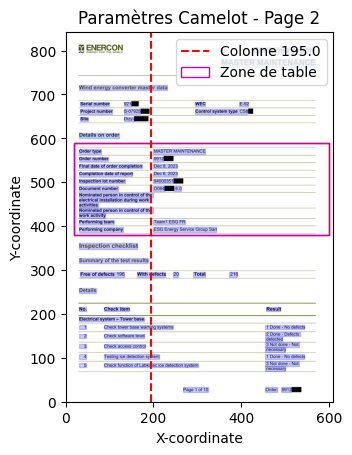

In [14]:

camelot_parameters = {
            'flavor': 'stream',
            'columns': ['195'],
            'table_areas': ['20,590,600,380'],
            'edge_tol': 700,
            'row_tol': 13,
            'split_text': False,   
            'strip_text': '\n',   
        }

enercon_report.visualize_camelot_parameters(2, **camelot_parameters)